## MapReduce

In [ ]:
# Install mrjob library. This package is for running MapReduce jobs with Python
!pip install mrjob

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

### Our Map-Reduce Class used to extract the needed statistics. 

##  1- Countries 

In [ ]:
%%file MedicalDevices.py
# important need lib for the map reduce functions
from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

# columns in our CSV file 
#split by ,
columns = 'tradeName,genericName,IssueDate,ExpiryDate,Manufacture_CountryEn,IsLocalManufacturer,Jurisdiction_en,deviceType_en,Classification_en,accessories'.split(',')

class MedicalDevices(MRJob):
 def steps(self):
     return[
        MRStep(mapper=self.mapper_get_ratings,
              reducer=self.reducer_count_ratings)
        ]
#Mapper function 
 def mapper_get_ratings(self, _, line):
       reader = csv.reader([line])
       for row in reader:
           zipped=zip(columns,row)
           diction=dict(zipped)
           Device = diction['Manufacture_CountryEn']
           #outputing as key value pairs
           yield Device, 1
           
#Reducer function
 def reducer_count_ratings(self, key, values):
       yield key, sum(values)


if __name__ == "__main__":
    MedicalDevices.run()

Overwriting MedicalDevices.py


##  2- Continent 

In [ ]:
%%file MedicalDevices.py
# important need lib for the map reduce functions
from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

# columns in our CSV file 
#split by ,
columns = 'tradeName,genericName,IssueDate,ExpiryDate,Manufacture_CountryEn,IsLocalManufacturer,Jurisdiction_en,deviceType_en,Classification_en,accessories'.split(',')

class MedicalDevices(MRJob):
 def steps(self):
     return[
        MRStep(mapper=self.mapper_get_ratings,
              reducer=self.reducer_count_ratings)
        ]
#Mapper function 
 def mapper_get_ratings(self, _, line):
       reader = csv.reader([line])
       for row in reader:
           zipped = zip(columns,row)
           diction = dict(zipped)
           Device = diction['Jurisdiction_en']
           #outputing as key value pairs
           yield Device, 1
           
#Reducer function
 def reducer_count_ratings(self, key, values):
       yield key, sum(values)


if __name__ == "__main__":
    MedicalDevices.run()

Overwriting MedicalDevices.py


In [ ]:
# run the code as a terminal command
!python MedicalDevices.py list_medical.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MedicalDevices.root.20221126.144345.824215
Running step 1 of 1...
job output is in /tmp/MedicalDevices.root.20221126.144345.824215/output
Streaming final output from /tmp/MedicalDevices.root.20221126.144345.824215/output...
"Japan"	208
"Jurisdiction_en"	1
"United States of America"	9740
"Australia"	94
"Canada"	292
"Europe"	73120
Removing temp directory /tmp/MedicalDevices.root.20221126.144345.824215...


**Hadoop Run:**



 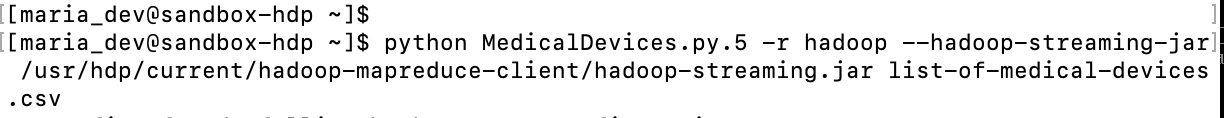


**Hadoop Results:**


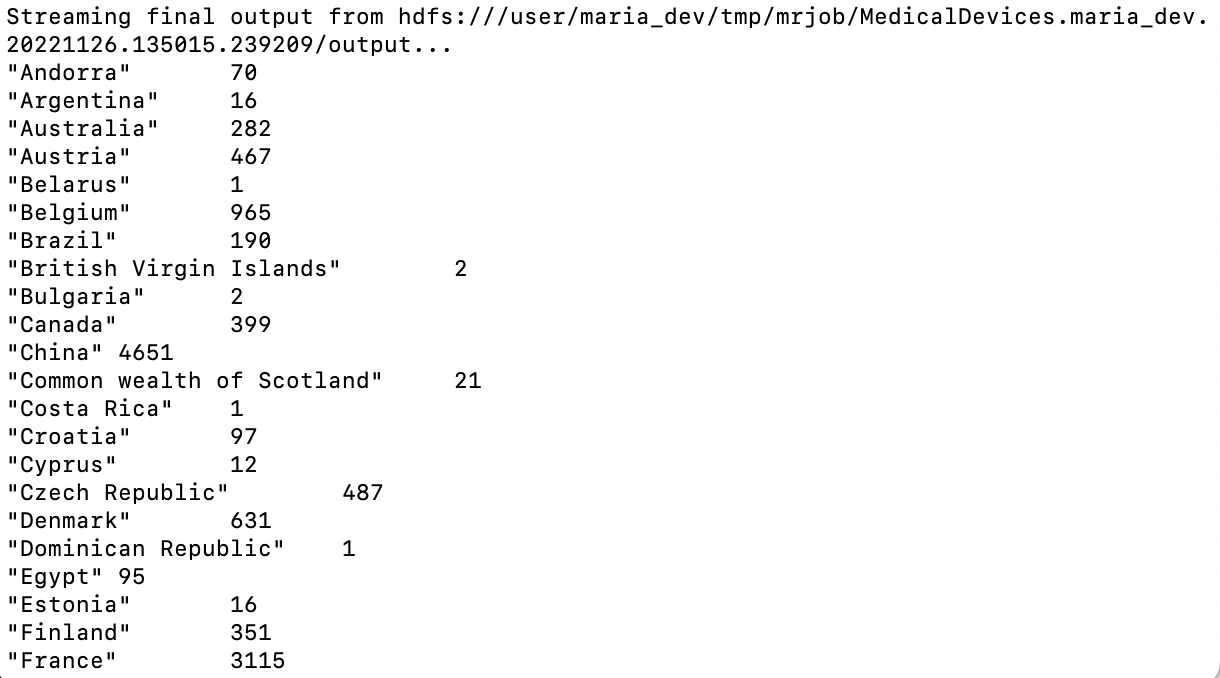

In [8]:
dict_for_conteries = {
    "Slovakia" : 23, "Slovenia":  95, "South Africa": 10, "Spain" : 1716, "Swaziland":  327, 
    "sweden" : 1923, "Switzerland"	: 3624,"Taiwan"	:  562, "Thailand" : 5, "Turkey":  539, 
    "United Arab Emirates" : 25, "United Kingdom": 	3882, "United States" : 25490, "Andorra" : 70, 
    "Argentina" : 16, "Australia":  282, "Austria": 467, "Belarus" : 1 , "Belgium" : 965 , 
    "Brazil" : 190, "British Virgin Islands" :  2, "Bulgaria":  2, "Canada":  399, "China" : 4651, 
    "Common wealth of Scotland" : 21, "Costa Rica":  1, "Croatia" : 97, "Cyprus"	:  12, 
    "Czech Republic": 487, "Denmark" : 631, "Dominican Republic" : 1, "Egypt" : 95, "Estonia" : 16, 
    "Finland" : 351, "France": 3115, "Georgia" : 1, "Germany" : 20769, "Greece"	:  119, "Hong Kong" : 42,
    "Hungary" : 158 , "Iceland" : 24, "India" : 856 , "Indonesia":  4 , "Ireland" : 999 ,  "Italy" : 4274, 
    "Japan" :1631 , "Jordan" : 29, "Korea North" :2 , "Korea South" : 1792, "Latvia" :11, "Lebanon" :8, 
    "Liechtenstein" : 198, "Lithuania" :37, "Luxembourg" : 14, "Malaysia" : 163, "Mexico"	: 23, "Monaco": 2, 
    "Netherlands" :733 , "New Zealand" :36 , "Norway" : 38, "Oman" : 15, "Pakistan": 53, "Peru" : 6,
    "Philippines" : 56, "Poland" : 580, "Portugal" : 148, "Romania" : 1, "Russia" : 16, "San Marino" : 1,
    "Saudi Arabia" : 2, "Singapore":  501, "Uruguay" : 19 }

In [9]:
# sorting and taking printing Top 10  
sorted_contries = sorted(dict_for_conteries.items(), key = lambda kv: kv[1])
sorted_contries[-10:]

[('Spain', 1716),
 ('Korea South', 1792),
 ('sweden', 1923),
 ('France', 3115),
 ('Switzerland', 3624),
 ('United Kingdom', 3882),
 ('Italy', 4274),
 ('China', 4651),
 ('Germany', 20769),
 ('United States', 25490)]

In [10]:
# creating dataframe for the country and the number of devices they produces. 
df_counteries = pd.DataFrame(dict_for_conteries.items(), columns=['Country', 'Device_Numbers'])
# converting the type of 'device_numbers' to int 
df_counteries.Device_Numbers = df_counteries.Device_Numbers.astype(int)
# Sorting the 'device_numbers' in ascending order  
df_counteries = df_counteries.sort_values(by=['Device_Numbers'])
df_counteries

,Country,Device_Numbers
35,Georgia,1
30,Dominican Republic,1
17,Belarus,1
66,Romania,1
25,Costa Rica,1
...,...,...
11,United Kingdom,3882
44,Italy,4274
23,China,4651
36,Germany,20769


In [12]:
# only Taking the top 10 countries from the dataframe and storing it in another dataframne called 'df_counteries_top10'
df_counteries_top10 = df_counteries.iloc[-10:, :]
df_counteries_top10

,Country,Device_Numbers
3,Spain,1716
48,Korea South,1792
5,sweden,1923
34,France,3115
6,Switzerland,3624
11,United Kingdom,3882
44,Italy,4274
23,China,4651
36,Germany,20769
12,United States,25490


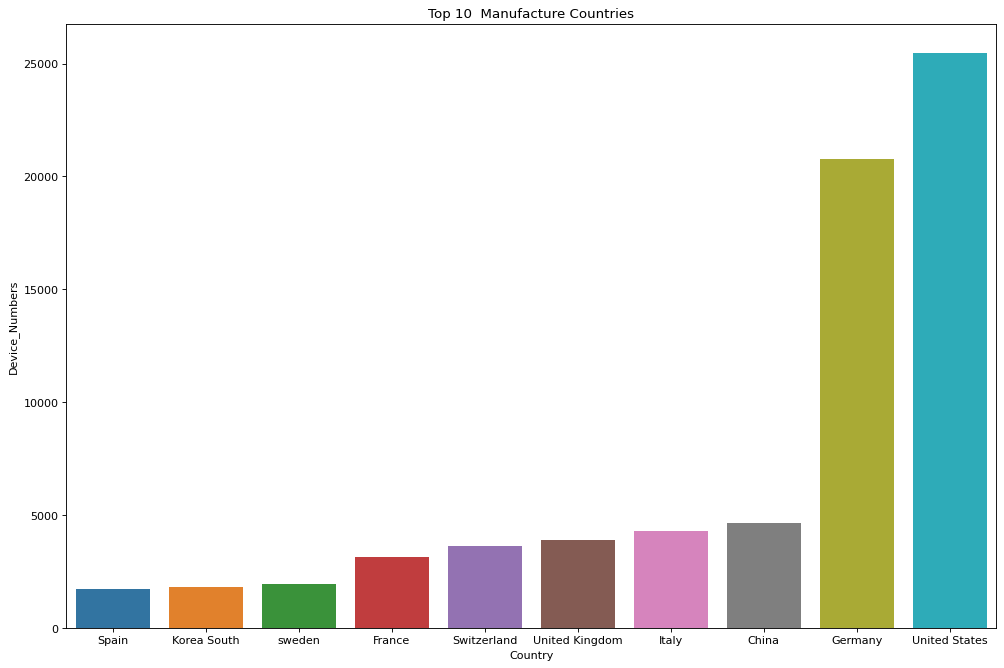

In [13]:
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Top 10  Manufacture Countries')
sns.barplot(data=df_counteries_top10, x="Country", y="Device_Numbers")

In [3]:
dict_for_Jurisdiction ={ "Japan" :	208, "United States of America"	: 9740, "Australia"	: 94, 
"Canada":	292 , "Europe":	73120 }

In [4]:
sorted_contries = sorted(dict_for_Jurisdiction.items(), key = lambda kv: kv[1])
sorted_contries

[('Australia', 94),
 ('Japan', 208),
 ('Canada', 292),
 ('United States of America', 9740),
 ('Europe', 73120)]

In [5]:
# creating dataframe for the country and the number of devices they produces. 
dict_Jurisdiction = pd.DataFrame(dict_for_Jurisdiction.items(), columns=['Jurisdiction', 'Total_Devices'])
# converting the type of 'Total Devices' to int 
dict_Jurisdiction.Total_Devices = dict_Jurisdiction.Total_Devices.astype(int)
# Sorting the 'Total Devices' in ascending order  
dict_Jurisdiction = dict_Jurisdiction.sort_values(by=['Total_Devices'])
dict_Jurisdiction

,Jurisdiction,Total_Devices
2,Australia,94
0,Japan,208
3,Canada,292
1,United States of America,9740
4,Europe,73120


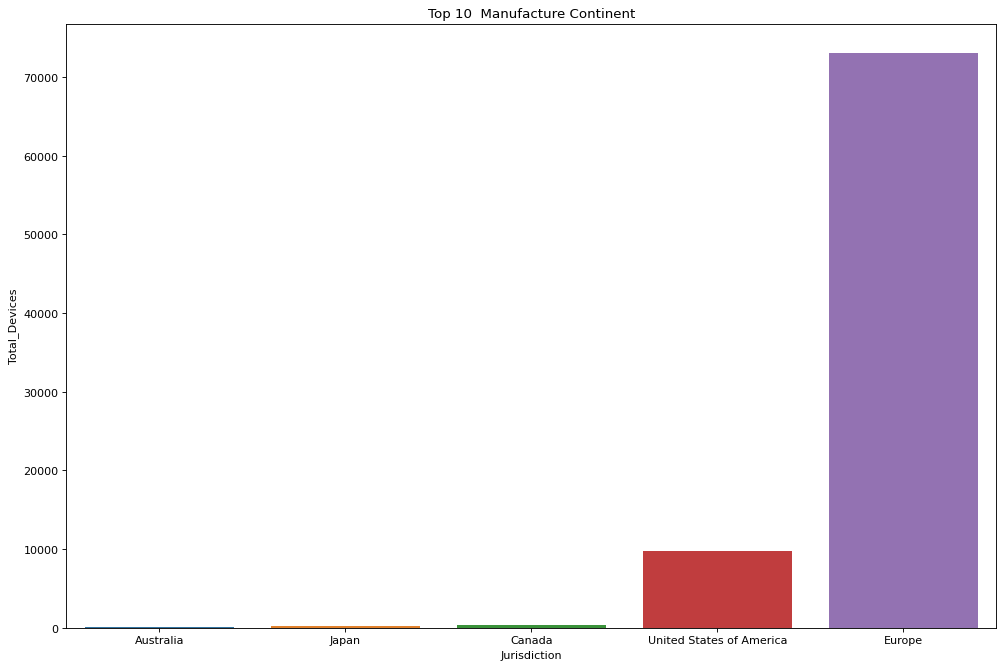

In [6]:
plt.figure(figsize=(15, 10), dpi=80)
plt.title('Top 10  Manufacture Continent')
sns.barplot(data=dict_Jurisdiction, x="Jurisdiction", y="Total_Devices")